# Polynomial Part

In [24]:
import pandas as pd
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv("data/data_filtrage_5.csv")

In [3]:
df=data.copy()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='z_force'>

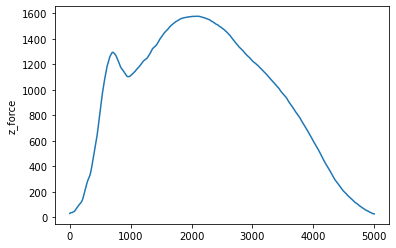

In [4]:
sns.lineplot(df.index[:5000],df['z_force'].iloc[:5000])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
y=df['z_force']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [10]:
rfr.score(X_test,y_test)

0.9999428288379051

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [12]:
cross_val_score(rfr,X,y,cv=5).mean()

0.8940960431203697

In [13]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,random_state=42,test_size=0.2)
lr = LinearRegression()
cross_val_score(lr,X_poly,y,cv=5).mean()

0.8766799737509716

In [14]:

X_train_tho=X_poly[:-5000,:]
y_train_tho=y[:-5000]
X_test_tho=X_poly[495000:,:]
y_test_tho=y[495000:]
lr_tho = LinearRegression()
lr_tho.fit(X_train_tho, y_train_tho)
y_pred_tho=lr_tho.predict(X_test_tho)

In [15]:
lr_tho.score(X_test_tho,y_test_tho)

0.9753103236184426

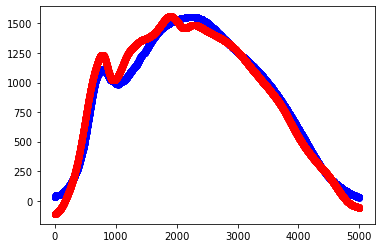

In [16]:
x=range(0,5000)
plt.scatter(x,y_test_tho,color='b')
plt.scatter(x,y_pred_tho,color='r')

In [17]:
for i in range(0,495000,5000):
    if i==0:
        X_train=X_poly[5000:,:]
        y_train=y[5000:]
        X_test=X_poly[0:5000,:]
        y_test=y[0:5000]
    elif i==495000:
        X_train=X_poly[:495000,:]
        y_train=y[:495000]
        X_test=X_poly[495000:,:]
        y_test=y[495000:]
    
    

# SVR Part

In [18]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

X_train_tho=df.iloc[:-5000,3:].drop(['x_force','z_force','y_force'],axis=1)
y_train_tho=df['z_force'].iloc[:-5000]
X_test_tho=df.iloc[495000:,3:].drop(['x_force','z_force','y_force'],axis=1)
y_test_tho=df['z_force'].iloc[495000:]

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

sv=SVR()
sv.fit(X_train[:5000], y_train[:5000])
sv.score(X_test[:5000],y_test[:5000])


0.8079469072000031

In [20]:
sv.fit(X_train_tho[:5000], y_train_tho[:5000])
sv.score(X_test_tho[:5000],y_test_tho[:5000])

0.8080657287820558

In [21]:
sv.fit(X_train_tho[:50000], y_train_tho[:50000])
sv.score(X_test_tho[:50000],y_test_tho[:50000])

0.9466368193621618

In [22]:
y_pred_tho_sv=sv.predict(X_test_tho)

13621.859033446179

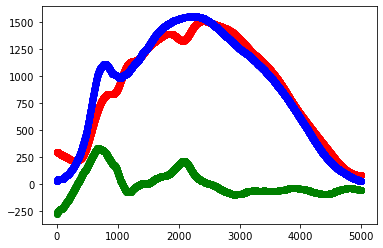

In [25]:
plt.scatter(x,y_pred_tho_sv,color='r')
plt.scatter(x,y_test_tho,color='b')
plt.scatter(x,y_test_tho-y_pred_tho_sv,color='g')

mean_squared_error(y_test_tho, y_pred_tho_sv)
a=np.mean((y_test_tho - y_pred_tho_sv)**2)
a

In [26]:
sv.fit(X_train[:100000], y_train[:100000])
sv.score(X_test[:100000],y_test[:100000])

13621.859033446179

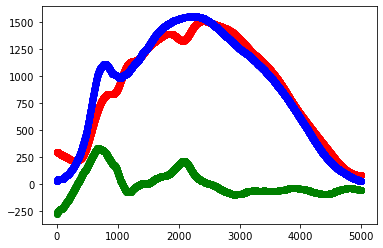

In [ ]:
plt.scatter(x,y_pred_tho_sv,color='r')
plt.scatter(x,y_test_tho,color='b')
plt.scatter(x,y_test_tho-y_pred_tho_sv,color='g')

mean_squared_error(y_test_tho, y_pred_tho_sv)
a=np.mean((y_test_tho - y_pred_tho_sv)**2)
a

In [ ]:
# sv.fit(X_train[:200000], y_train[:200000])
# sv.score(X_test[:200000],y_test[:200000])